# Plotting Fractals

## Warmup

Example to explain what fractals are

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

**1.** Function to compute f(z) = z^2 - 1

In [12]:
def f(z):
    return np.square(z) - 1


Very simple function call

In [13]:
f(0)

-1


More complex value for z

In [14]:
z = [4,1-0.2j,1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])


Create a complex plain to apply function to

In [15]:
x,y = np.meshgrid(np.linspace(-10,10,20),np.linspace(-10,10,20))
mesh = x+ (1j * y)    # Make mesh of complex plane


Put mesh into function. Since universal function was used, function will be applied to each value in the mesh

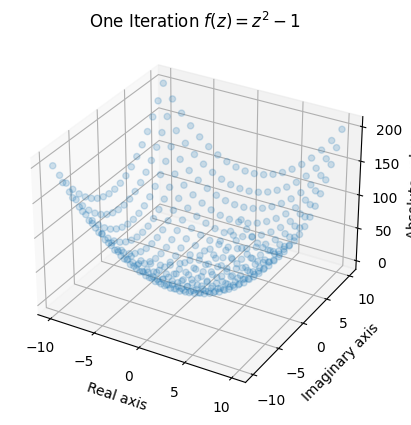

In [16]:
output = np.abs(f(mesh))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x,y,output,alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('One Iteration $ f(z) = z^2 - 1$')

plt.show()


Another iteration of taking the function of the mesh

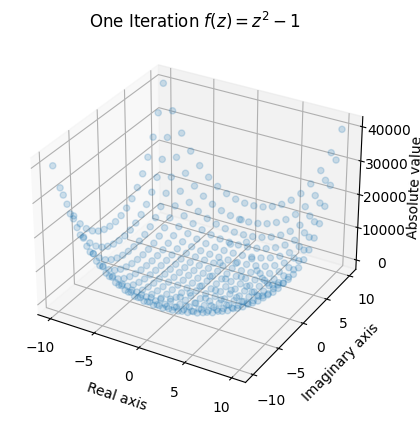

In [17]:
output = np.abs(f(f(mesh)))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x,y,output,alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('One Iteration $ f(z) = z^2 - 1$')

plt.show()


Use a complex z value and loop through more iterations

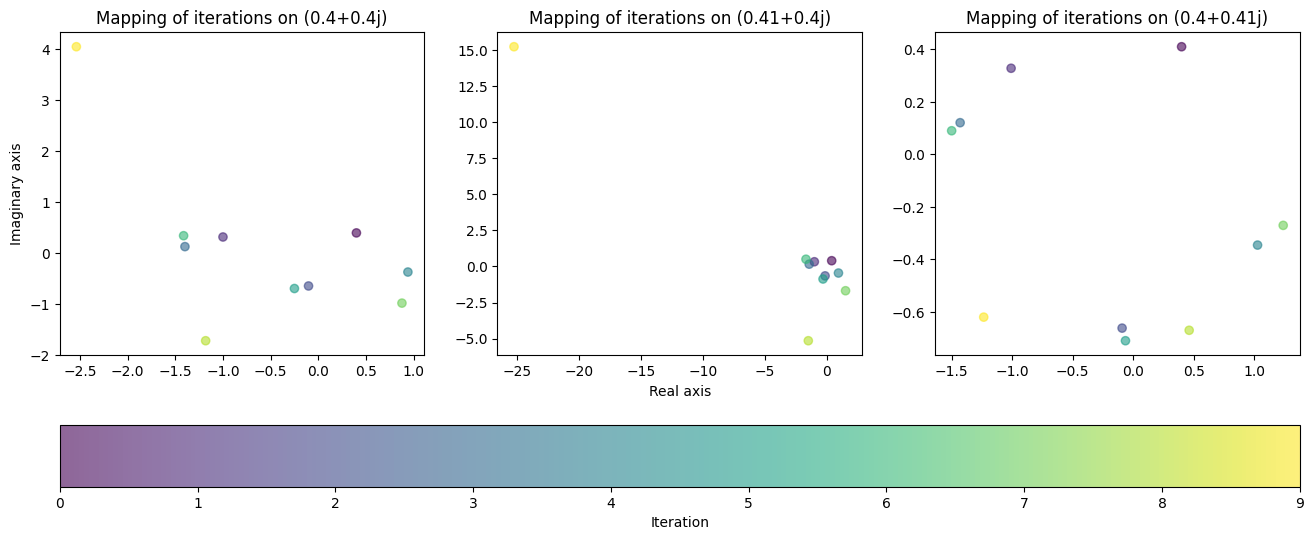

In [20]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros((num_iter+1, selected_values.shape[0]), dtype=complex)
outputs[0] = selected_values

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # Apply 10 iterations, save each output

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(data.real, data.imag, c=range(data.shape[0]), alpha=0.6)
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location="bottom", label='Iteration');


Determine when the fractal diverges

In [21]:
def divergence_rate(mesh,num_iter=10,radius=2):
    
    z = mesh.copy()
    diverge_len = np.zeros(mesh.shape) # tally of number of iterations
    
    #Iterate on element if and only if |element| < radius (otherwise assume divergece)
    for i in range(num_iter):
        conv_mask = np.abs(z)<radius
        diverge_len[conv_mask] += 1
        z[conv_mask] = f(z[conv_mask])
        
    return diverge_len


Create fractal by showing tallies of convergence using the function

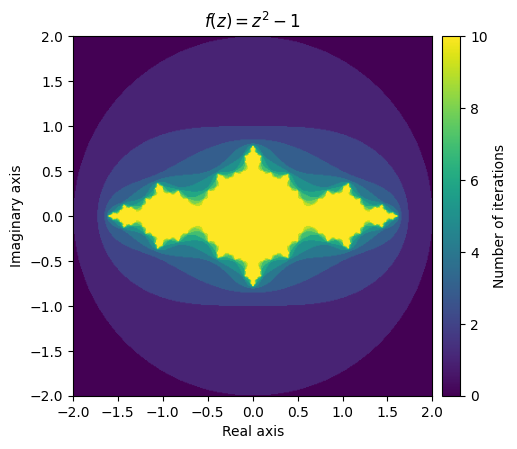

In [22]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2 -1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');